# Polynomial Learner

## Packages and Data Set

### Import Packages

In [1]:
# package imports for numeric computing
import numpy as np
import random as rnd
# Inputting latex
from IPython.display import display, Math, Latex
# package import for graphing
import matplotlib.pyplot as plt
%matplotlib inline

### Generating Data

In [2]:
# Generating sample training data
# Function: sin(2pi*x) + rand()
# rand used to add noise to the training data and norm. dist.
trainVals = 100
X = [rnd.random() for r in xrange(trainVals)]
Y = [np.sin(2*np.pi*x) + (3/2)*np.random.normal(0,0.6) for x in X]
trainData = np.column_stack((X,Y))
print("The function we will be predicting")
display(Math(r'y_i = sin(2\pi x_i) + \frac{3}{2}rand()'))
print("Where rand() is used to add noise to the data.") 

The function we will be predicting


<IPython.core.display.Math object>

Where rand() is used to add noise to the data.


### Graphing the training data

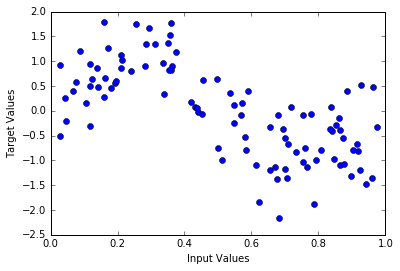

In [3]:
plt.plot(X,Y,"o")
plt.xlabel("Input Values")
plt.ylabel("Target Values")
plt.show()

### The Effect of Noise to a Dataset

These are plots of the same underlying function sin(2*pi*x), with the standard deviation of the gaussian random noise function being the only difference


<IPython.core.display.Math object>

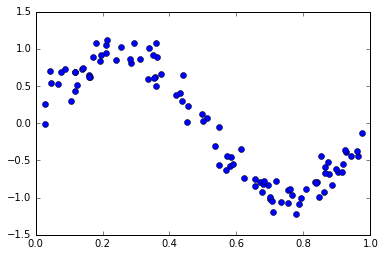

<IPython.core.display.Math object>

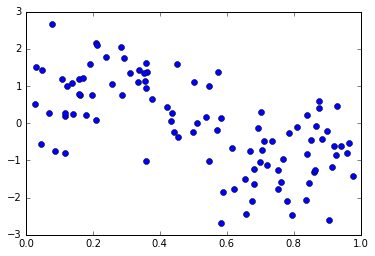

In [4]:
print("These are plots of the same underlying function sin(2*pi*x), with the standard "\
      +"deviation of the gaussian random noise function being the only difference")
Y_1 = [np.sin(2*np.pi*x) + (3/2)*np.random.normal(0,0.15) for x in X]
Y_2 = [np.sin(2*np.pi*x) + (3/2)*np.random.normal(0,0.85) for x in X]
display(Math(r'\sigma = 0.15'))
plt.plot(X,Y_1,'o'); plt.show()
display(Math(r'\sigma = 0.85'))
plt.plot(X,Y_2,'o'); plt.show()


## Defining Functions

### Regression Function

In [5]:
def y(x,weights):
    yVector = [weights[i]*x**i for i in range(0,len(weights))]
    return sum(yVector)
print("The polynomial regression function we're using is defined:")
display(Math(r'f(x,w) = \sum_{i=0}^{n}w_{i}x^i'))

The polynomial regression function we're using is defined:


<IPython.core.display.Math object>

### Loss Functions

In [6]:
# Basic cost funct.
# divided through by training data length the normalize
def loss(w,trainData):
    cost = 0
    for i in range(0,len(trainData)):
        cost += (y(trainData[i][0],w) - trainData[i][1])**2 
    return cost/(2*len(trainData))

# Cost funct. with weight decay
# remember to add ld to main funct. when using
def lossWD(w, trainData,ld):
    cost = 0
    for i in range(0,len(trainData)):
        cost += (y(trainData[i][0],w) - trainData[i][1])**2 + (ld/2)*abs(sum(w))**2
    return cost/(2*len(trainData))

print( "The two loss functions we will look at are:")
display(Math(r'loss(x) = \frac{1}{2m}\bigg(\sum_{i=1}^{m}\big(f(x_i,W) - y_i\big)^2\bigg)'))
display(Math(r'lossWD(x) = \frac{1}{2m}\bigg(\sum_{i=1}^{m}\big(f(x_i,W) - y_i\big)^2\bigg) + \frac{\lambda}{2}||W||^2'))
print(" lossWD(x) includes a weight decay function used for regularisation of the model")

The two loss functions we will look at are:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

 lossWD(x) includes a weight decay function used for regularisation of the model


### Gradient Descent Function

In [7]:
def gradDescent(weighting,trainData,learnRate,ld):
    wGrad = np.zeros(len(weighting))
    N = len(trainData)
    for point in range(0, N):   
        for i in range(0, len(weighting)):
            wGrad[i] += trainData[point][0]**i*(y(trainData[point][0],weighting) \
            - trainData[point][1]) - ld*abs(weighting[i])
    w_ = [origW - learnRate*(float(1)/float(N))*wIter for origW, wIter \
          in zip(weighting, wGrad)]
    return w_

print( "The gradient descent algorithm for this polynomial learner is:")
display(Math(r'w_i = w_i-\frac{\alpha}{n}\sum_{j=1}^{n}\big(f(x_j,W)-y_j\big)x_j^i'))

The gradient descent algorithm for this polynomial learner is:


<IPython.core.display.Math object>

## Training Process

### Optimisation Function

In [8]:
# Iteration Function
# optimise_() returns an array of the weights and error at n/4, n/2, 3n/4, n iterations."
def optimise_(weighting, trainData, learnRate, ld, maxIter, minTOL):
    n = 0
    TOL = 10e10
    optList = [] # Probably should change var name
    # look in bishops book, Tychonov regularization, ld = 1.0 e-18
    while n < maxIter and  TOL > minTOL:
        weighting = gradDescent(weighting, trainData, learnRate,ld)
        TOL = loss(weighting, trainData)
        n += 1
        if n%(int(round(maxIter/5))) == 0:
            optList += [[n, TOL, weighting]]
            print("The TOL at n = " + str(n) +" is " + str(round(TOL,6))) 
    return optList
print("optimise_() is a iterative function using gradient descent to find the optimal" \
     + " values for the weighting vector.")

optimise_() is a iterative function using gradient descent to find the optimal values for the weighting vector.


### Optimise Hyperparmeters

In [9]:
# Performs a grid search to find the optimimum hyperparam. values.
# The hyperparam in this case are the learning rate, the max. coefficient of the weighting
# 
def hyperParamOpt(): 
    optError = 10e10; initWeights = None
    for maxWeightCoef in [i for i in range(3,10)]:
        for learnRate in [10**(-i) for i in range(2,7)]:
            for alpha in [10**(-i) for i in range(2,7)]:
                weights = [2*rnd.random()-1 for x in range(0,maxWeightCoef)]
                wList, _ = optimise(weights, trainData, alpha, learnRate, 1000, 0.005)
                Error = loss(wList,trainData)
                #print [Error, maxWeightCoef, learnRate, alpha]
                if Error < optError:
                    optConditions = [Error, maxWeightCoef, learnRate, alpha]
                    optError = Error
                    initWeights = weights
        print maxWeightCoef
    return optConditions, initWeights
#optHyperparam, initWeights = hyperParamOpt()
#print optHyperparam

print("hyperParamOpt() performs a grid search to find the optimal hyperparameters to " \
      + "solve this     problem.")
print("The hyperparameters in the polynomial learner problem are: weightIndex, learnRate, " \
      + "and the   weight decay lambda variable.")

hyperParamOpt() performs a grid search to find the optimal hyperparameters to solve this     problem.
The hyperparameters in the polynomial learner problem are: weightIndex, learnRate, and the   weight decay lambda variable.


## Learner Results

### Perform Optimisation

The TOL at n = 1600 is 0.185758
The TOL at n = 3200 is 0.176207
The TOL at n = 4800 is 0.169219
The TOL at n = 6400 is 0.164088
The TOL at n = 8000 is 0.160318


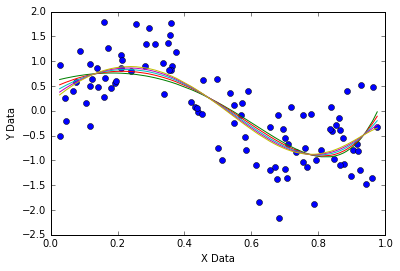

In [10]:
# def optimise(weighting, trainData, learnRate, ld, maxIter, minTOL):
initWeights = [2*rnd.random()-1 for x in range(10)]
X_ = sorted(X)
optList = optimise_(initWeights, trainData, 1, 1e-5, 8000, 0.005)
plt.plot(X,Y,"o")
for i in range(len(optList)):
    y_ = [y(x, optList[i][2]) for x in X_]
    plt.plot(X_, y_)
plt.ylabel("Y Data")
plt.xlabel("X Data")
plt.show()

### Plot Function y_(x,W) with Optimised Weights

[0.16622936499735355, 6.0051852683528413, -11.603651158937097, -4.3401286970614112, 2.1716517140607925, 5.5427456913754707, 5.2411058041691803, 3.0767348929876293, -1.0754301298281213, -5.4815453247864978]


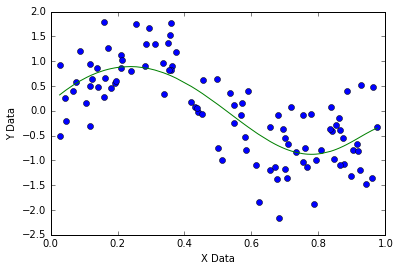

In [11]:
optWeights = optList[-1][2]
trainTOL = optList[-1][1]
print(optWeights)
y_ = [y(x,optWeights) for x in X_]
plt.plot(X,Y,"o")
plt.plot(X_,y_)
plt.ylabel("Y Data")
plt.xlabel("X Data")
plt.show()

### Analyse Results with Test Set

The training set error is 0.160318
The test set error is 0.115949
This gives a generalization error of 0.044369 or 0.383%


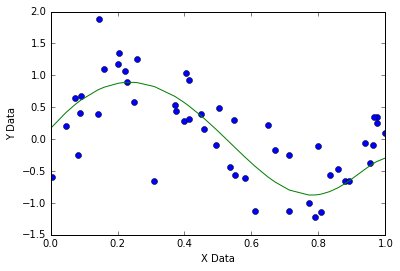

In [12]:
testVals = 50
XTest = [rnd.random() for r in xrange(testVals)]
YTest = [np.sin(2*np.pi*x) + np.random.normal(0,0.5) for x in XTest]
testData = np.column_stack((XTest,YTest))
testTOL = loss(optWeights, testData)
genError = abs(trainTOL - testTOL)
genErrorPercent = genError/testTOL
XTest_ = sorted(XTest)
yTest_ = [y(x,optWeights) for x in XTest_]
print("The training set error is " + str(round(trainTOL,6)))
print("The test set error is " + str(round(testTOL,6)))
print("This gives a generalization error of " + str(round(genError,6)) + " or " \
      + str(round(genErrorPercent,3)) + "%")
plt.plot(XTest,YTest,"o")
plt.plot(XTest_,yTest_)
plt.ylabel("Y Data")
plt.xlabel("X Data")
plt.show()